In [1]:
import pandas as pd
import os

In [2]:
os.chdir(r'C:\Users\shres\OneDrive\Desktop\windspeed')

In [3]:
from spacepy import pycdf

In [4]:
cdf = pycdf.CDF('wi_h1_swe_20120101_v01.cdf')

In [9]:
cdf

<CDF:
Alpha_Na_nonlin: CDF_FLOAT [872]
Alpha_VX_nonlin: CDF_FLOAT [872]
Alpha_VY_nonlin: CDF_FLOAT [872]
Alpha_VZ_nonlin: CDF_FLOAT [872]
Alpha_V_nonlin: CDF_FLOAT [872]
Alpha_W_nonlin: CDF_FLOAT [872]
Alpha_Wpar_nonlin: CDF_FLOAT [872]
Alpha_Wperp_nonlin: CDF_FLOAT [872]
Alpha_sigmaNa_nonlin: CDF_FLOAT [872]
Alpha_sigmaVX_nonlin: CDF_FLOAT [872]
Alpha_sigmaVY_nonlin: CDF_FLOAT [872]
Alpha_sigmaVZ_nonlin: CDF_FLOAT [872]
Alpha_sigmaV_nonlin: CDF_FLOAT [872]
Alpha_sigmaW_nonlin: CDF_FLOAT [872]
Alpha_sigmaWpar_nonlin: CDF_FLOAT [872]
Alpha_sigmaWperp_nonlin: CDF_FLOAT [872]
Ang_dev: CDF_FLOAT [872]
BX: CDF_FLOAT [872]
BY: CDF_FLOAT [872]
BZ: CDF_FLOAT [872]
ChisQ_DOF_nonlin: CDF_FLOAT [872]
EW_flowangle: CDF_FLOAT [872]
Epoch: CDF_EPOCH [872]
NS_flowangle: CDF_FLOAT [872]
Peak_doy: CDF_DOUBLE [872]
Proton_Np_moment: CDF_FLOAT [872]
Proton_Np_nonlin: CDF_FLOAT [872]
Proton_VX_moment: CDF_FLOAT [872]
Proton_VX_nonlin: CDF_FLOAT [872]
Proton_VY_moment: CDF_FLOAT [872]
Proton_VY_nonlin: CDF

In [50]:
cdf['Alpha_V_nonlin'].attrs

<zAttrList:
CATDESC: Alpha bulk speed V (km/s) from non-linear analysis [CDF_CHAR]
DELTA_MINUS_VAR: Alpha_sigmaV_nonlin [CDF_CHAR]
DELTA_PLUS_VAR: Alpha_sigmaV_nonlin [CDF_CHAR]
DEPEND_0: Epoch [CDF_CHAR]
DISPLAY_TYPE: time_series [CDF_CHAR]
FIELDNAM: Alpha bulk speed V (km/s) from non-linear analysis [CDF_CHAR]
FILLVAL: -1e+31 [CDF_FLOAT]
FORMAT: E12.2 [CDF_CHAR]
LABLAXIS: alpha bulk speed [CDF_CHAR]
SCALETYP: linear [CDF_CHAR]
UNITS: km/s [CDF_CHAR]
VALIDMAX: 9999.99 [CDF_FLOAT]
VALIDMIN: 0.0 [CDF_FLOAT]
VAR_NOTES: Obtained from non-linear fitting to the ion current distribution function (CDF). [CDF_CHAR]
VAR_TYPE: data [CDF_CHAR]
>

In [21]:
velocity = cdf['Alpha_V_nonlin'][:]

In [24]:
splits = [i*int(len(velocity)/24) for i in range(25)]

In [39]:
#split a day's data into 24 data points
data = []
for i in range(len(splits)-1):
    avg = sum(velocity[splits[i]:splits[i+1]])/(splits[i+1]-splits[i])
    data.append(avg)

In [40]:
len(data)

24

In [45]:
windspeed_data = []

In [46]:
for file in os.listdir(r'C:\Users\shres\OneDrive\Desktop\windspeed'):
    cdf = pycdf.CDF(file)
    velocity = cdf['Alpha_V_nonlin'][:]
    splits = [i*int(len(velocity)/24) for i in range(25)]
    for i in range(len(splits)-1):
        avg = sum(velocity[splits[i]:splits[i+1]])/(splits[i+1]-splits[i])
        windspeed_data.append(avg)

In [52]:
len(windspeed_data)

8736

In [49]:
24*364

8736

In [63]:
cdf['Alpha_V_nonlin'].attrs

<zAttrList:
CATDESC: Alpha bulk speed V (km/s) from non-linear analysis [CDF_CHAR]
DELTA_MINUS_VAR: Alpha_sigmaV_nonlin [CDF_CHAR]
DELTA_PLUS_VAR: Alpha_sigmaV_nonlin [CDF_CHAR]
DEPEND_0: Epoch [CDF_CHAR]
DISPLAY_TYPE: time_series [CDF_CHAR]
FIELDNAM: Alpha bulk speed V (km/s) from non-linear analysis [CDF_CHAR]
FILLVAL: -1e+31 [CDF_FLOAT]
FORMAT: E12.2 [CDF_CHAR]
LABLAXIS: alpha bulk speed [CDF_CHAR]
SCALETYP: linear [CDF_CHAR]
UNITS: km/s [CDF_CHAR]
VALIDMAX: 9999.99 [CDF_FLOAT]
VALIDMIN: 0.0 [CDF_FLOAT]
VAR_NOTES: Obtained from non-linear fitting to the ion current distribution function (CDF). [CDF_CHAR]
VAR_TYPE: data [CDF_CHAR]
>

In [60]:
import matplotlib.pyplot as plt

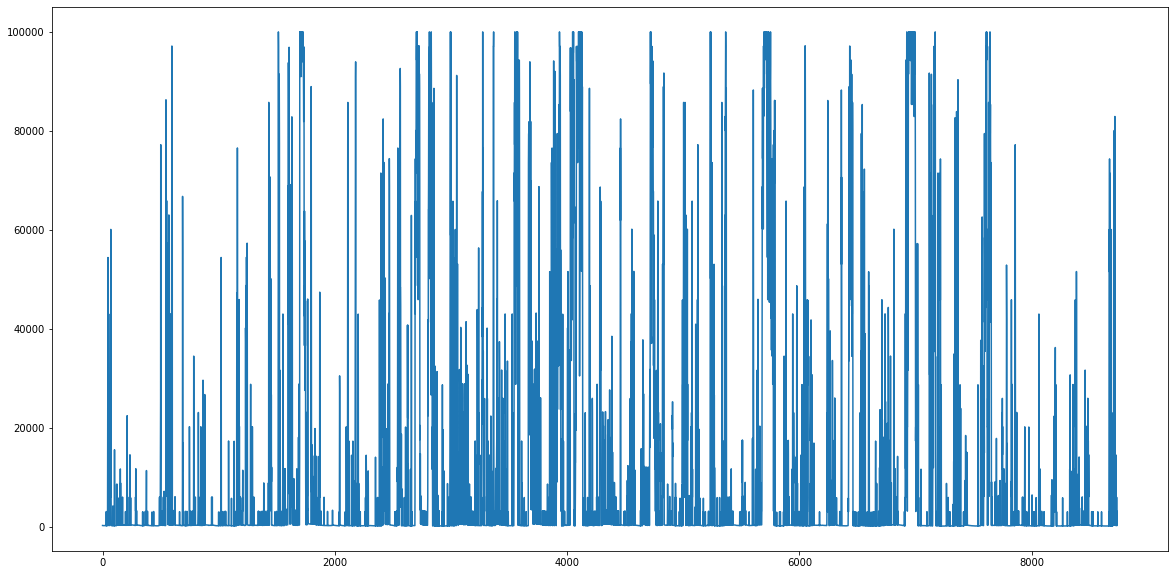

In [62]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(windspeed_data)

In [67]:
sum(windspeed_data)/len(windspeed_data)

11254.10996667366

In [68]:
import scipy

In [69]:
scipy.stats.mode(windspeed_data)

C:\Users\shres\AppData\Local\Temp\ipykernel_6072\430340977.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  scipy.stats.mode(windspeed_data)


ModeResult(mode=array([99999.8984375]), count=array([115]))

In [71]:
import numpy as np

In [74]:
windspeed_data = np.array(windspeed_data, dtype='float32')

In [87]:
np.percentile(windspeed_data, 50)

441.0931396484375

In [92]:
data = pd.DataFrame(windspeed_data, columns=['Windspeed (km/s)'])

In [95]:
data.to_csv(r'C:\Users\shres\windspeed.csv', index=False)

In [96]:
data.describe()

,Windspeed (km/s)
count,8736.000000
mean,11254.110352
std,24083.380859
min,265.956268
25%,360.808060
50%,441.093140
75%,6122.784302
max,99999.898438
